In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Problem Statement

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

PA/SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result


Following is the features of 2014 baseball stats and the target variable is W.

In [229]:
df=pd.read_csv('baseball.csv')

In [230]:
df.head(25)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [231]:
df.tail(25)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
12,85,661,5417,1331,243,21,176,435,1150,52,675,630,3.94,2,12,46,93
13,76,656,5544,1379,262,22,198,478,1336,69,726,677,4.16,6,12,45,94
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126


In [232]:
## checking null value in dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [234]:
df.shape


(30, 17)

## So it has 30 rows and 17 columns and datatypes is interger.


In [235]:
## Lets checck target variable
df['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79])

# EDA

In [236]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


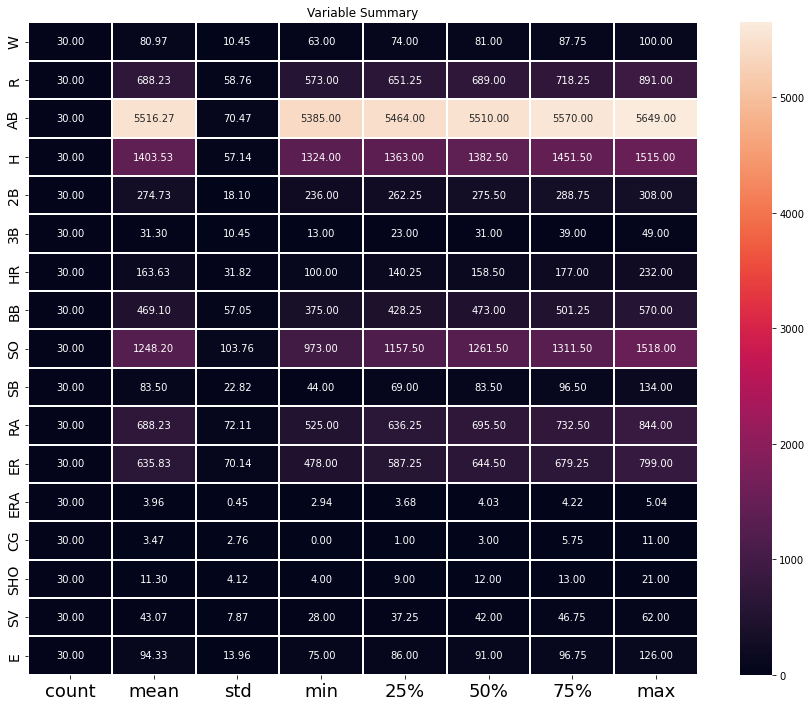

In [237]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe().transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title('Variable Summary')
plt.show()

### Obsevation:-
For some features the standard deviation larger which will cause skewness, further we will check...

<AxesSubplot:xlabel='W', ylabel='count'>

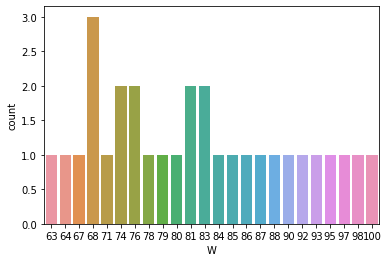

In [238]:
sns.countplot('W',data=df)

In [239]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:xlabel='R', ylabel='W'>

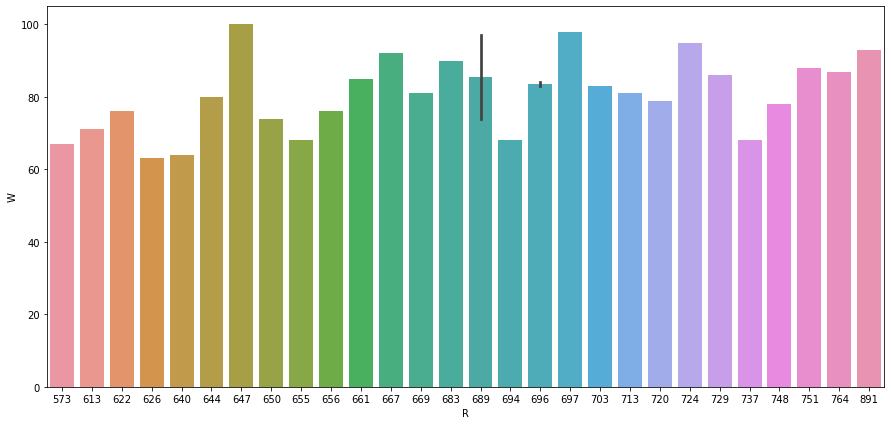

In [240]:
plt.figure(figsize=(15,7))
sns.barplot(x='R',y='W',data=df)

# Observation:- The Run scored 647 and 697 and 724 has most wins. 

<AxesSubplot:xlabel='ERA', ylabel='W'>

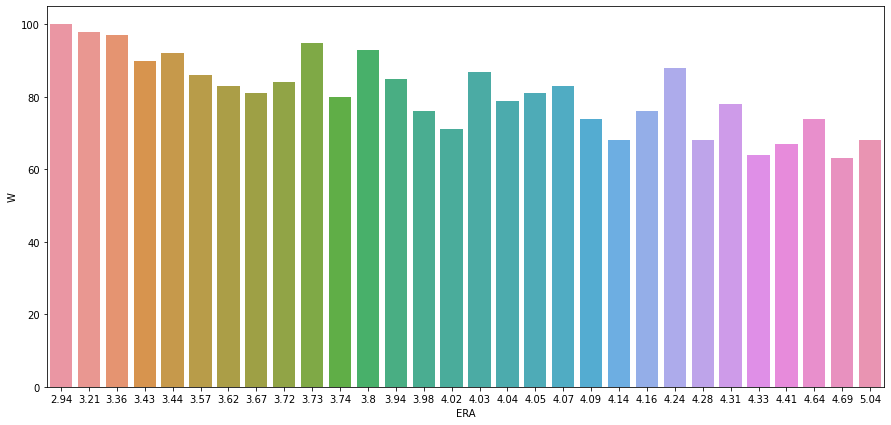

In [241]:
plt.figure(figsize=(15,7))
sns.barplot(x='ERA',y='W',data=df)

# Observation:- Earned Run Average(ERA) with minimum point gives more wins (W)

<AxesSubplot:xlabel='HR', ylabel='W'>

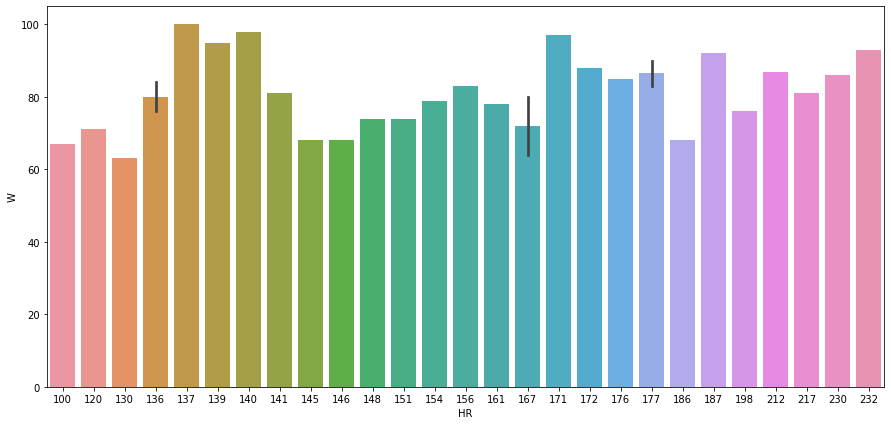

In [242]:
plt.figure(figsize=(15,7))
sns.barplot(x='HR',y='W',data=df)

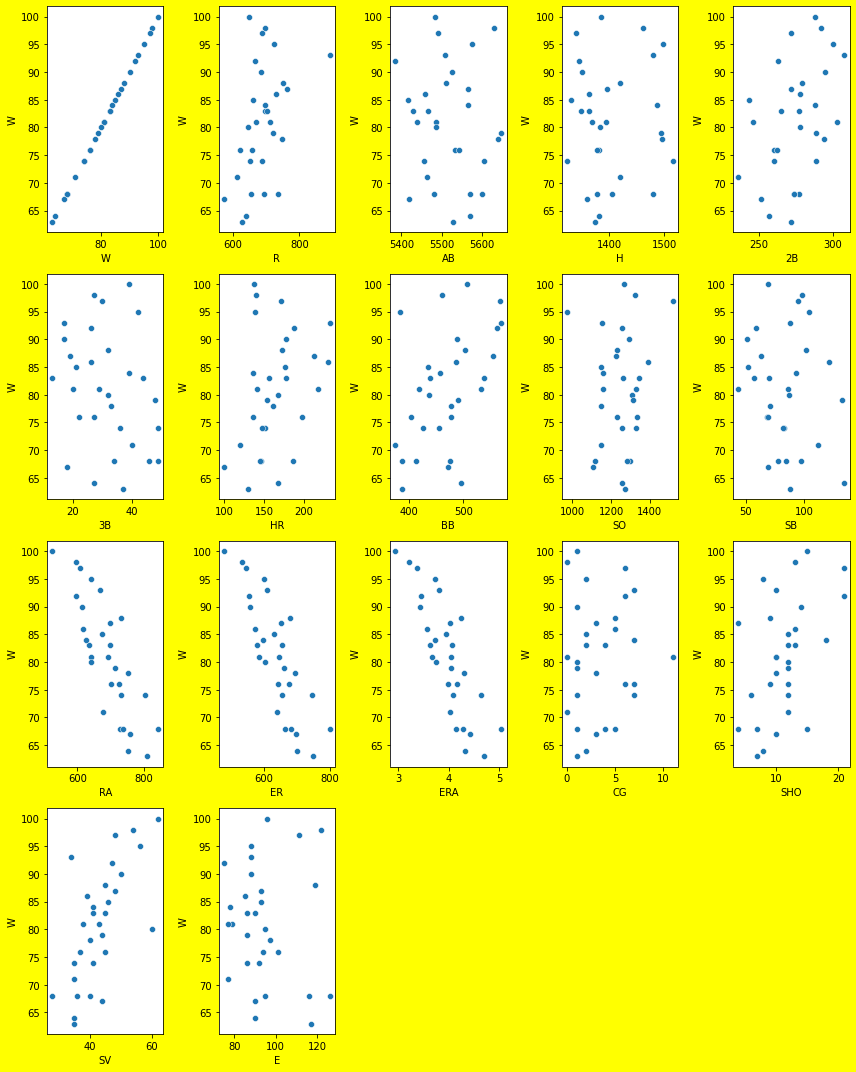

In [243]:
plt.figure(figsize=(12,15),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax=plt.subplot(4,5,plotnumber)
        sns.scatterplot(df[column],y='W',data=df)
        
    plotnumber=plotnumber+1

plt.tight_layout()


# Observation:- R,SV show postive linear to Win wheres as RA,ERA ,ER is negative linear to Wins while others are scatter everywhere

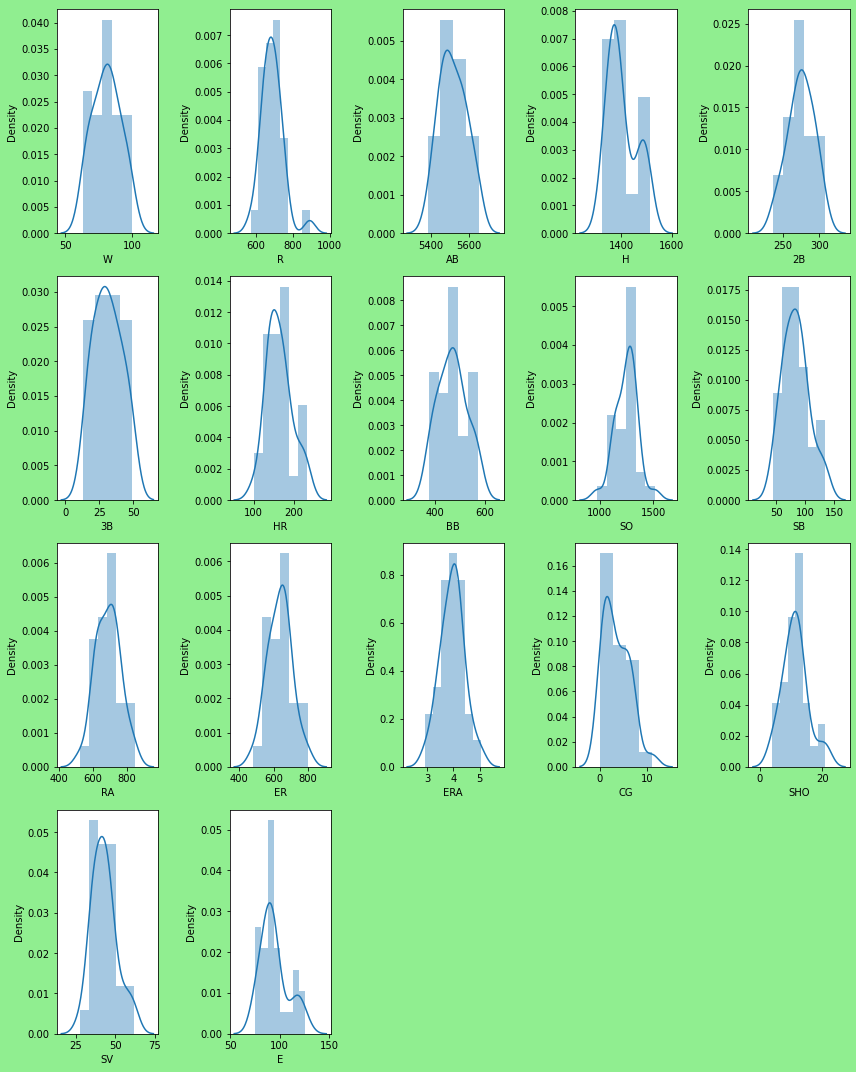

In [244]:
plt.figure(figsize=(12,15),facecolor='lightgreen')
plotnumber=1

for column in df:
    if plotnumber <= 18:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(df[column])
        
    plotnumber=plotnumber+1

plt.tight_layout()


# Observations:-

SV is bimodal and skewed
E is bimodal and skewed
CG is skewed
SHO is skewed
SO,R is also skewed 

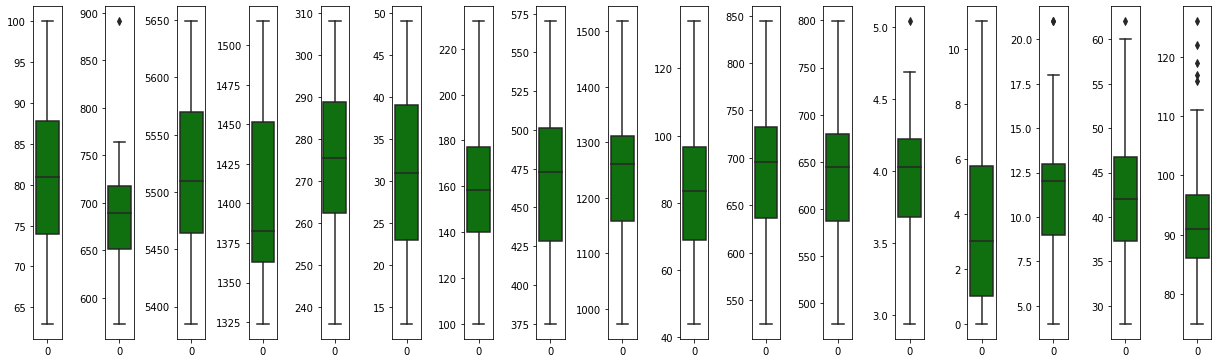

In [245]:
## Lets check box plot
collist=df.columns.values
ncol=30
nrows=18
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.xlabel=(df[collist[i]])
    plt.tight_layout()
    

# Observation:- Error(E) having outlier, SV, SHO,CG and Run(R) having some outliers

In [246]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [247]:
# Lets operate outlier and skewness


In [248]:
## Operating Skewness and  ouliers through zscore


from scipy.stats import zscore

In [249]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [250]:
df.shape


(29, 17)

# Data loss= 30-29=1


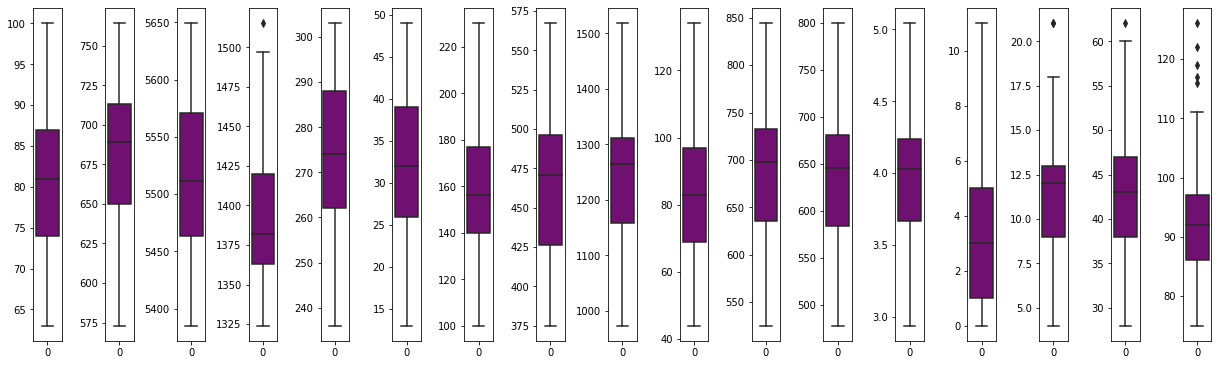

In [251]:
collist=df.columns.values
ncol=30
nrows=18
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='purple',orient='v')
    plt.xlabel=(df[collist[i]])
    plt.tight_layout()


In [252]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


<AxesSubplot:>

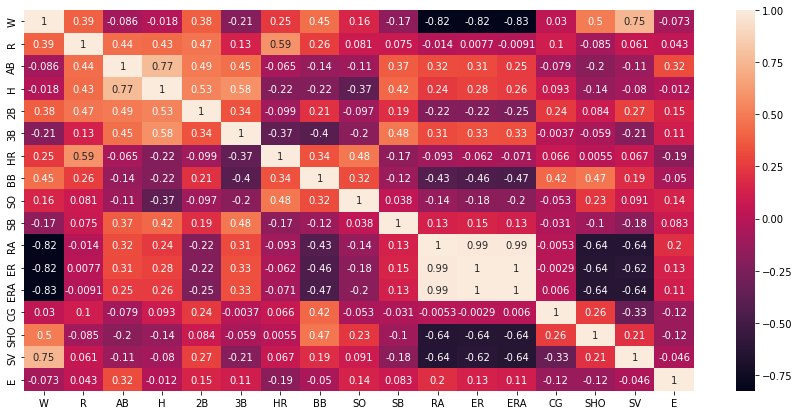

In [253]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})

# Observation:- E,RA,ERA is observed to have multicolinearity problem

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
scaler=StandardScaler()

In [256]:
X=df.drop("W",axis=1)
y=df.W
    

In [257]:
x=scaler.fit_transform(X)

In [258]:
x.shape[1]

16

In [259]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i)
           for i in range(x.shape[1])]
vif["feature"]=X.columns
vif


,vif,feature
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


<AxesSubplot:title={'center':'Correation with Win'}>

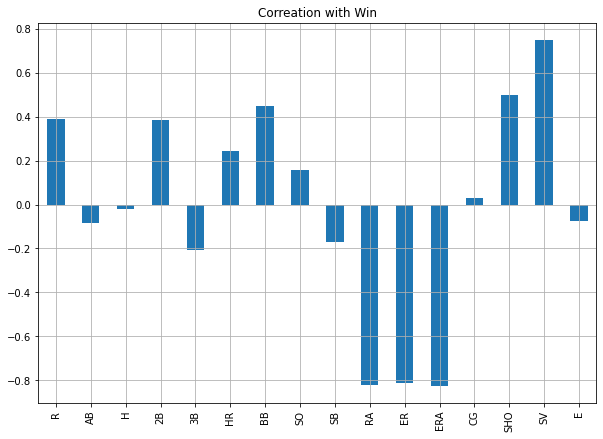

In [260]:
## Plotting correaltion with target variable.
X.corrwith(df.W).plot(kind='bar',grid=True,figsize=(10,7),title='Correation with Win')

## Since most of the features posses multicolinearity problem..Applying PCA can handle multicolinearity problem and dimension reduction

In [261]:
from sklearn.decomposition import PCA

In [262]:
pca=PCA()

In [263]:
pca.fit_transform(x)

array([[ 1.04041826e+00, -2.99848184e+00,  2.39063059e+00,
        -7.82861328e-01, -2.44000230e+00, -7.69301307e-03,
         6.40909629e-01,  3.39132156e-01,  8.37185019e-01,
        -2.19622700e-02, -5.96073539e-01, -2.88473539e-01,
        -1.48792637e-01,  1.84951137e-01, -7.39241199e-02,
         9.49314166e-03],
       [ 8.25018860e-02,  4.73553990e-01,  3.33380521e-01,
        -1.82391989e-01, -3.20951442e-01,  4.67550521e-01,
        -1.03905534e+00,  1.23183805e+00,  1.89277987e-01,
        -6.77802968e-01,  6.14050340e-01, -2.11540195e-01,
         1.97368606e-02,  4.91117648e-01,  5.20670442e-02,
        -3.22283110e-02],
       [-1.23470311e+00, -8.52540089e-01, -3.82592418e-02,
         3.25226390e+00, -7.57128783e-01, -7.14970087e-01,
         1.54910458e+00,  1.35171012e+00,  1.30465790e-01,
         5.47695824e-01,  5.05777712e-01,  9.75146362e-02,
         9.79152344e-02, -1.08509741e-01, -7.90998042e-03,
         7.60535686e-04],
       [ 6.80562041e-01,  1.42335306e

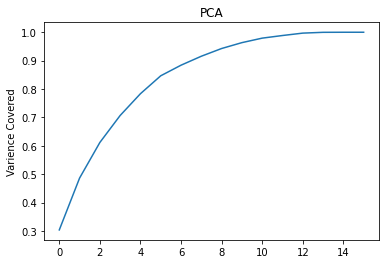

In [264]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

# Observation:- We can take principal component = 13 which covers maximum variance

In [265]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(x)
p_c=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])


In [266]:
p_c

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,1.040418,-2.998482,2.390631,-0.782861,-2.440002,-0.007693,0.640910,0.339132,0.837185,-0.021962,-0.596074,-0.288474,-0.148793
1,0.082502,0.473554,0.333381,-0.182392,-0.320951,0.467551,-1.039055,1.231838,0.189278,-0.677803,0.614050,-0.211540,0.019737
2,-1.234703,-0.852540,-0.038259,3.252264,-0.757129,-0.714970,1.549105,1.351710,0.130466,0.547696,0.505778,0.097515,0.097915
3,0.680562,1.423353,0.804293,0.994373,0.358662,-0.945762,-0.009278,-0.101724,0.144915,1.581640,-0.479499,0.121201,0.720541
4,3.375800,-1.483663,-0.739327,1.793146,-0.109332,0.217560,-1.128995,0.293687,-1.216725,0.140332,-0.087418,0.171118,0.026218
5,-0.329446,-0.226394,-2.762484,-1.300450,-1.693950,-1.053420,1.057617,-0.426011,-0.077575,-0.567319,0.166482,0.141720,0.833282
6,-0.708705,2.230857,-1.603350,-1.601015,-1.676362,0.858409,-1.233220,-0.557468,0.106016,0.558265,0.123334,0.225442,-0.001087
7,-1.402802,-0.019392,1.155383,-1.545183,0.051551,0.432543,-0.010320,0.861289,-0.729311,-0.073429,-0.847197,-0.435728,-0.167266
8,2.148232,-1.993567,-0.923356,-0.089902,-1.171097,-1.143858,-0.387613,-0.841622,-0.334200,-0.149301,0.461296,0.062081,-0.329627
9,1.036721,-0.929021,-1.425914,-0.335159,0.622014,-1.038534,0.793520,0.338591,0.841189,-0.953543,-0.819650,0.410281,-0.349550


# Observation:- now the features are transformed into components

In [267]:
p_c.skew()

PC1    -0.019201
PC2    -0.076310
PC3     0.165780
PC4     0.695842
PC5     0.308535
PC6     0.647998
PC7     0.563067
PC8     0.228543
PC9     0.319065
PC10    0.510947
PC11   -0.163154
PC12   -0.081417
PC13    0.724852
dtype: float64

### Skewness of data is reduced 

In [268]:
## Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV


In [269]:
lr=LinearRegression()

In [270]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(p_c,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    if round(r2_score(y_train,ypred)*100,1)==round(r2_score(y_test,y_pred)*100,1):
        print('At random state',i,'The model performs well')
        print('At random_state',i)
        print('The training Score-',round(r2_score(y_train,ypred)*100,1))
        print('The testing Score-',round(r2_score(y_test,y_pred)*100,1))


At random state 860 The model performs well
At random_state 860
The training Score- 89.9
The testing Score- 89.9


In [271]:
x_train,x_test,y_train,y_test=train_test_split(p_c,y,test_size=0.20,random_state=860)


In [272]:
lr.fit(x_train,y_train)
ypred=lr.predict(x_train)
y_pred=lr.predict(x_test)


In [273]:
print('The training Score-',round(r2_score(y_train,ypred)*100,1))
print('The testing Score-',round(r2_score(y_test,y_pred)*100,1))


The training Score- 89.9
The testing Score- 89.9


<AxesSubplot:ylabel='W'>

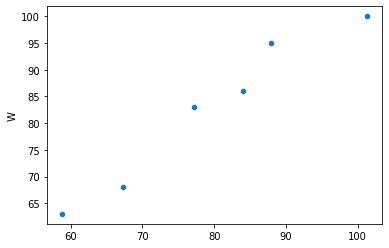

In [274]:
sns.scatterplot(x=y_pred,y=y_test)

In [275]:
print('MSE:  ',mean_squared_error(y_test,y_pred))
print('MAE:  ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:   17.932538929863593
MAE:   3.510149474152809
RMSE:  4.234682860600495


In [276]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,p_c,y,cv=5)


array([ 0.48538183, -1.77406697,  0.56387554,  0.52202808,  0.88917073])

In [277]:
## L1 and L2 regularization
## Ridge Regression through cross-validation
ridgecv=RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [278]:
ridgecv.alpha_

1.0

In [279]:
## So the best alpha=1
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [280]:
ypred=ridge.predict(x_train)
r2_score(y_train,ypred)*100

89.5508189196745

In [281]:
y_pred=ridge.predict(x_test)
r2_score(y_test,y_pred)

0.9078645394626483

In [282]:
print('MSE:  ',mean_squared_error(y_test,y_pred))
print('MAE:  ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:   16.361722200424694
MAE:   2.9217572529620326
RMSE:  4.04496257095473


In [283]:
cross_val_score(ridge,p_c,y,cv=5)


array([ 0.525677  , -1.70703695,  0.6375079 ,  0.84814685,  0.90735159])

In [284]:
### LASSO rigression through cross validation
lassocv=LassoCV(cv=5,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=5, normalize=True)

In [285]:
print(lassocv.alpha_)

0.37311581092296103


In [288]:
##LASSO Regression
lasso=Lasso(alpha=0.3731)
lasso.fit(x_train,y_train)

Lasso(alpha=0.3731)

In [289]:
ypred=lasso.predict(x_train)
print(r2_score(y_train,ypred)*100)

86.46897101550427


In [291]:
y_pred=lasso.predict(x_test)
print(r2_score(y_test,y_pred)*100)

85.5800686142759


In [292]:
print('MSE:  ',mean_squared_error(y_test,y_pred))
print('MAE:  ',mean_absolute_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:   25.60739481914838
MAE:   3.8360801127122905
RMSE:  5.060374968235889


In [293]:
cross_val_score(lasso,p_c,y,cv=5)


array([ 0.4707778 , -1.60900498,  0.63902666,  0.8609991 ,  0.87384907])

# Observation:-  The Error of of Ridge Regression is less than Lasso regression.So we can consider ridge to better performing in this case which L2 regularization



In [302]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('\n Training result')
        print(r2_score(y_train,ypred))
    elif train==False:
        y_pred=clf.predict(x_test)
        print(' Test Result')
        print(r2_score(y_test,y_pred))
        print('MSE:  ',mean_squared_error(y_test,y_pred))
        print('MAE:  ',mean_absolute_error(y_test,y_pred))
        print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [303]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [304]:
rf=RandomForestRegressor()

In [305]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [306]:
model(rf,x_train,x_test,y_train,y_test,train=True)


 Training result
0.895488548583819


In [307]:
model(rf,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.44295814171750325
MSE:   98.92135000000006
MAE:   8.418333333333337
RMSE:  9.945921274572811


In [308]:
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [309]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)


 Training result
0.9999998476211094


In [310]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.3250657139019605
MSE:   119.85708030624352
MAE:   9.268208766046719
RMSE:  10.947925844937183


In [311]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [312]:
model(xgb,x_train,x_test,y_train,y_test,train=True)


 Training result
0.999999997728338


In [313]:
model(xgb,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.011626389622065525
MSE:   175.51868030961487
MAE:   11.511781056722006
RMSE:  13.248346323583743


In [314]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [315]:
model(svr,x_train,x_test,y_train,y_test,train=True)


 Training result
0.2631546779537711


In [316]:
model(svr,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.09555655134353969
MSE:   160.61408242390974
MAE:   11.44111407765896
RMSE:  12.673361133649973


## Conclusion:- All the model are overfitted. Gradient Boosting is better than other model selected. So we can tune it hyperparameter to reduce overfitting through GridSearchCV


In [317]:
## import GridsearchCV
from sklearn.model_selection import GridSearchCV

In [327]:
params={'loss':['squared_error'],
       'n_estimators':[100],
        'learning_rate':[0.0001,0.001,0.01,0.002,1],
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[1,2,3,4,5,6]
       }

In [328]:
gs=GridSearchCV(estimator=gbdt,param_grid=params,cv=5,n_jobs=-1)

In [329]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.002, 1],
                         'loss': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100]})

In [330]:
gs.best_params_

{'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [331]:
gbdt=GradientBoostingRegressor(learning_rate=0.01,loss='squared_error',max_depth=1,min_samples_split=2,n_estimators=100)

In [332]:
gbdt.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=1)

In [333]:
model(gbdt,x_train,x_test,y_train,y_test,train=True)


 Training result
0.5280345303564165


In [334]:
model(gbdt,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.262333209853731
MSE:   130.99732748347495
MAE:   9.863172308390304
RMSE:  11.445406392237672


In [336]:
## Hyperparameter tuning of RandomForest
params={'criterion':['squared_error'],
       'n_estimators':[100],
        'max_features':['auto'],
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[1,2,3,4,5,6]
       }

In [337]:
gs=GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)

In [339]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [100]})

In [340]:
gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 1,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [341]:
rf=RandomForestRegressor(criterion='squared_error',max_depth=1,max_features='auto',min_samples_split=2,n_estimators=100)

In [342]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=1)

In [343]:
model(rf,x_train,x_test,y_train,y_test,train=True)


 Training result
0.6241076425804547


In [344]:
model(rf,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.3474151821378072
MSE:   115.8881872386944
MAE:   9.119222186739991
RMSE:  10.765137585683446


In [345]:
cross_val_score(rf,p_c,y,cv=5)

array([-0.50821667, -1.36586695,  0.1074579 , -0.56882744,  0.53602389])

## Final Conculsion:-

1. Ridge model better r2_score for this model.
2. Second Best is Linear Regression.
3. Other model are overfitted and has less r2_score and more mse,mae
4. So we can Ridge as final model

In [347]:
model(ridge,x_train,x_test,y_train,y_test,train=True)


 Training result
0.8955081891967449


In [348]:
model(ridge,x_train,x_test,y_train,y_test,train=False)

 Test Result
0.9078645394626483
MSE:   16.361722200424694
MAE:   2.9217572529620326
RMSE:  4.04496257095473


In [349]:
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [350]:
Report

,Actual,Predicted
0,95,84.723224
11,86,87.810188
15,100,97.124843
29,68,66.147017
24,63,62.528651
1,83,77.269973


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

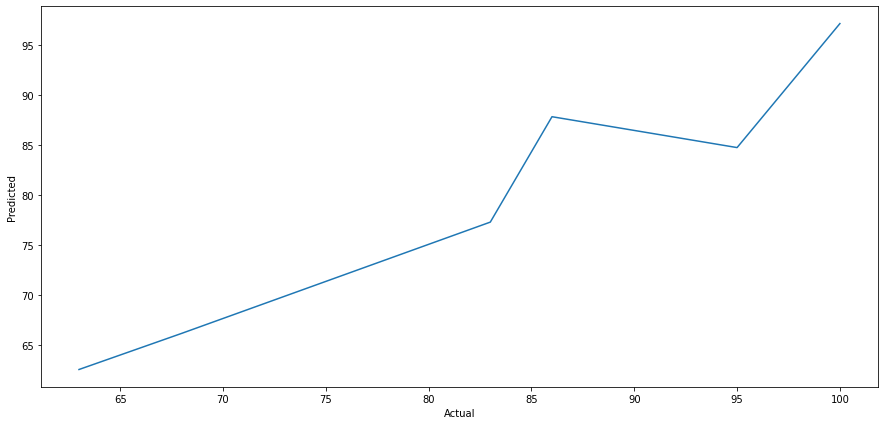

In [351]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Actual',y='Predicted',data=Report)


# Saving The Ridge model using pickle

In [352]:
import pickle
filename='Baseball.pickle'
pickle.dump(ridge,open(filename,'wb'))